## libraries

In [102]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

## load data

- https://archive.ics.uci.edu/ml/datasets/wholesale+customers
- about data
    - 도매 유통업체 고객 데이터 세트
    - 다양한 제품 범주에 대한 연간 지출이 포함됨
    - 화폐 단위 : mu
- columns
    - Channel
        - 고객의 채널
        - 1) Horeca = 호텔 / 레스토랑 / 카페
        - 2) Retail = 소매
    - Region
        - 고객의 지역
        - 1) Lisbon
        - 2) Oporto
        - 3) others
    - Fresh 
        - 신선 제품에 대한 연간 지출
    - Milk
        - 유제품에 대한 연간 지출
    - Grocery
        - 식료품에 대한 연간 지출
    - Frozen
        - 냉동 제품에 대한 연간 지출
    - Detergents_Paper
        - 세제 및 종이 제품에 대한 연간 지출
    - Delicassen
        - 델리카트슨 제품에 대한 연간 지출

In [77]:
df = pd.read_csv('../data/Wholesale customers data.csv')
df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776


In [78]:
df.shape

(440, 8)

In [79]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [81]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## eda

In [82]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [83]:
# category columns (명목형 데이터)
print('Channel : ')
print(df['Channel'].value_counts())
print('Region : ')
print(df['Region'].value_counts())

Channel : 
1    298
2    142
Name: Channel, dtype: int64
Region : 
3    316
1     77
2     47
Name: Region, dtype: int64


Channel : 


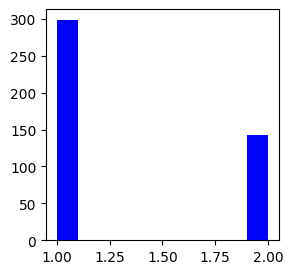

Region : 


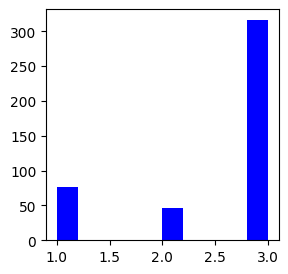

In [84]:
category_cols = ['Channel', 'Region']
for col in category_cols:
    print(f'{col} : ')
    plt.figure(figsize=(3, 3))
    plt.hist(df[col], color='b')
    plt.show()

In [85]:
# numeric columns (연속형 데이터)
numeric_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df[numeric_cols].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Fresh : 


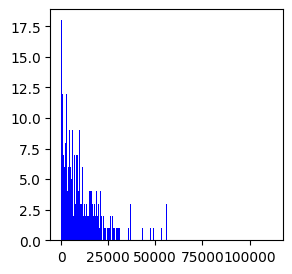

Milk : 


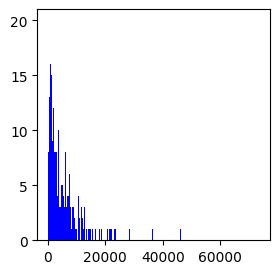

Grocery : 


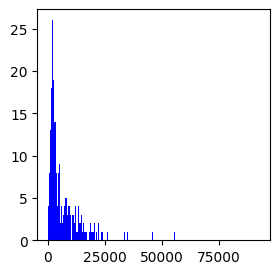

Frozen : 


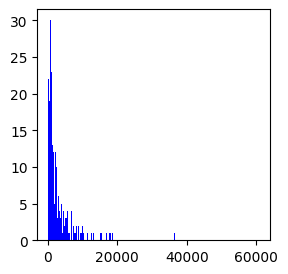

Detergents_Paper : 


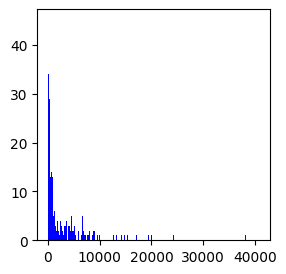

Delicassen : 


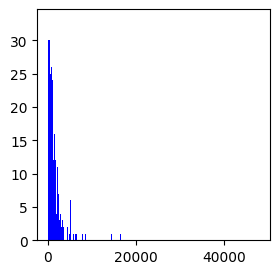

In [86]:
'''
need outlier & normalization preprocessing
'''
for col in numeric_cols:
    print(f'{col} : ')
    plt.figure(figsize=(3, 3))
    unique = len(df[col].unique())
    plt.hist(df[col], bins=unique, color='b')
    plt.show()

## preprocessing

In [87]:
# encoding
# => catergory features has already been converted to an integer
# => but, one-hot encoding can be tried !

In [88]:
# normalization
# => to fit within a certain range
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [89]:
df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,2,3,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984


## model

In [90]:
# find optimal k
# 1) Elbow Method
# 2) Silhouette


Done. (find optimal k)


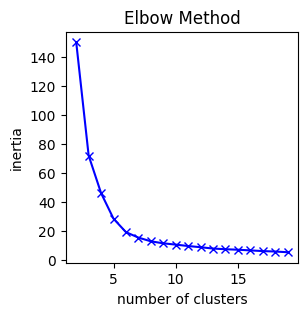

Done. (plot elbow method)


In [91]:
# 1) Elbow Method
inertia = []
k_range = range(2, 20)

# find optimal k
for k in k_range:

    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0)
    kmeans.fit(df)

    inertia_val = kmeans.inertia_
    inertia.append(inertia_val)

print('Done. (find optimal k)')

plt.figure(figsize=(3, 3))
plt.plot(k_range, inertia, 'bx-')
plt.title('Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

print('Done. (plot elbow method)')

best k : 6
best silhouette : 0.7923258982297074
Done. (find optimal k)


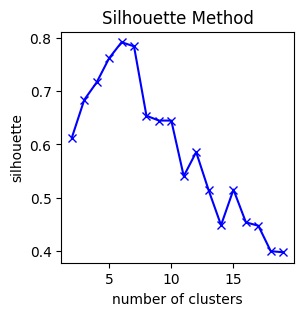

Done. (plot elbow method)


In [92]:
# 2) Silhouette
silhouette = []
k_range = range(2, 20)

# find optimal k
best_silhouette, best_k = -1, -1

for k in k_range:

    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0)
    kmeans.fit(df)
    clusters = kmeans.predict(df)

    silhouette_val = silhouette_score(df, clusters)
    silhouette.append(silhouette_val)

    if silhouette_val > best_silhouette:
        best_silhouette = silhouette_val
        best_k = k

print(f'best k : {best_k}')
print(f'best silhouette : {best_silhouette}')
print('Done. (find optimal k)')

plt.figure(figsize=(3, 3))
plt.plot(k_range, silhouette, 'bx-')
plt.title('Silhouette Method')
plt.xlabel('number of clusters')
plt.ylabel('silhouette')
plt.show()

print('Done. (plot elbow method)')

In [96]:
# train model
# 1) kmeans
# 2) dbscan

In [93]:
# optimal k value
optimal_k = 6

# kmeans
km = KMeans(n_clusters=optimal_k, max_iter=1000, random_state=0)
# model train and predict
cluster_label = km.fit_predict(df)
# label
df['label'] = cluster_label

# cluster centers
centers = km.cluster_centers_
# cluster labels
labels = km.labels_

In [94]:
# check add labels
df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
0,2,3,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,3
1,2,3,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,3


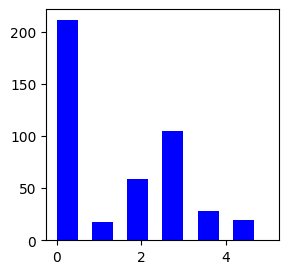

In [95]:
# check label distribution
plt.figure(figsize=(3, 3))
plt.hist(labels, bins=optimal_k, width=0.5, color='b')
plt.show()

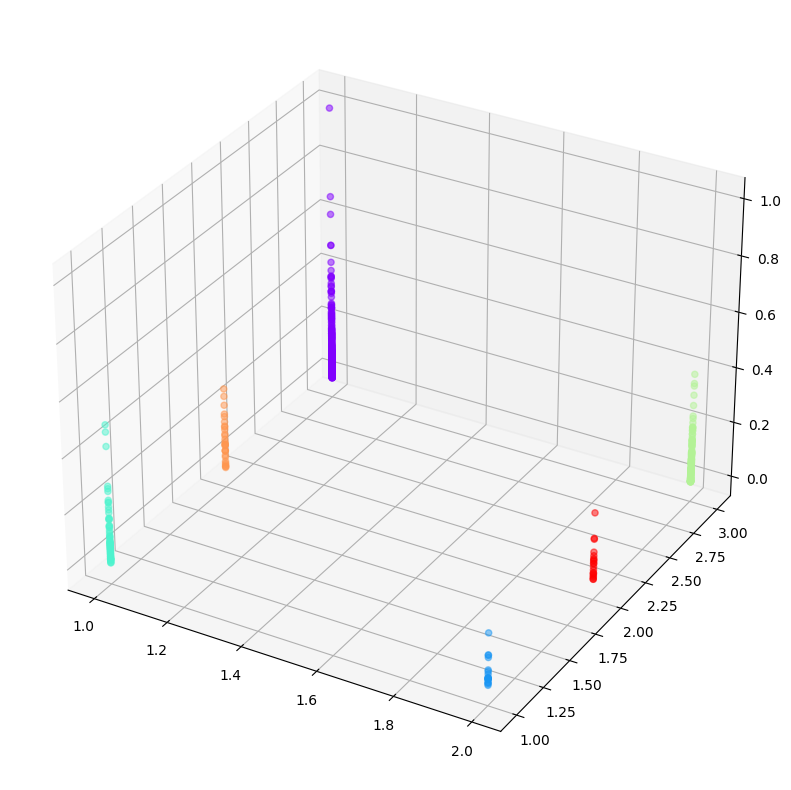

In [111]:
# 3d visualization based on t-SNE
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
x = df['Channel']
y = df['Region']
z = df['Fresh']
ax.scatter(x, y, z, c=labels, alpha=0.5, s=20, cmap='rainbow')